In [40]:
# Importar as bibliotecas pandas, matplotlib e seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Lendo o arquivo CSV em um DataFrame do pandas
df = pd.read_csv('social_ads.csv') 

Análise Exploratória
Verificar os detalhes do DataFrame e visualizar algumas estatísticas descritivas

In [13]:
# Mostrando informações básicas sobre as colunas, tipos de dados e valores ausentes
print(df.info())

# Estatísticas descritivas para entender a distribuição de cada coluna numérica
print(df.describe())

# Visualizando as primeiras linhas do DataFrame
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              367 non-null    int64
 1   EstimatedSalary  367 non-null    int64
 2   Purchased        367 non-null    int64
dtypes: int64(3)
memory usage: 11.5 KB
None
              Age  EstimatedSalary   Purchased
count  367.000000       367.000000  367.000000
mean    37.722071     70719.346049    0.376022
std     10.681383     34772.173908    0.485047
min     18.000000     15000.000000    0.000000
25%     29.500000     43000.000000    0.000000
50%     37.000000     71000.000000    0.000000
75%     46.000000     89000.000000    1.000000
max     60.000000    150000.000000    1.000000
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


Resumo da saída: Dimensões:
O DataFrame possui 367 registros (linhas) e 3 colunas.
Colunas e Tipos de Dados:
Age: Tipo int64, 367 valores não nulos.
EstimatedSalary: Tipo int64, 367 valores não nulos.
Purchased: Tipo int64, 367 valores não nulos.

Estatísticas Descritivas (.describe()):

Média:
Idade média: 37.7 anos
Salário médio: 70.719 dólares
Percentual de compras: 37.6%

Desvio Padrão:
Idade: ±10.7 anos
Salário: ±34.772 dólares
Compra: ±48.5%

Quartis:
Age:
Mínimo: 18 anos
Percentil 25: 29.5 anos
Mediana (50%): 37 anos
Percentil 75: 46 anos
Máximo: 60 anos

EstimatedSalary:
Mínimo: 15.000 dólares
Percentil 25: 43.000 dólares
Mediana (50%): 71.000 dólares
Percentil 75: 89.000 dólares
Máximo: 150.000 dólares

Purchased:
Mínimo: 0 (não comprou)
Percentil 25: 0 (não comprou)
Mediana (50%): 0 (não comprou)
Percentil 75: 1 (comprou)
Máximo: 1 (comprou)

Criamos gráficos para entender a distribuição das variáveis

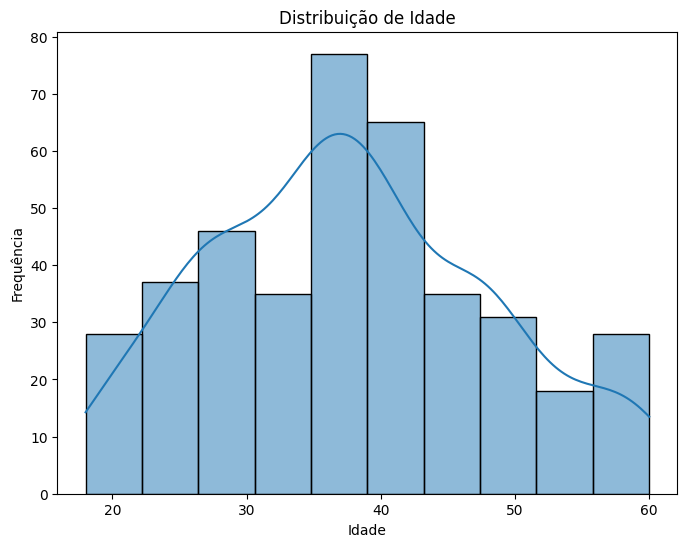

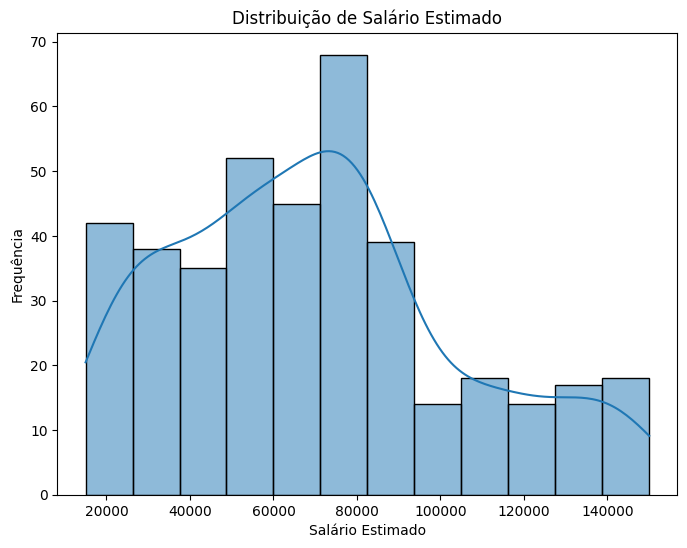

In [18]:
# Visualizar a distribuição da variável 'Age' (Idade)
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Visualizar a distribuição da variável 'EstimatedSalary' (Salário Estimado)
plt.figure(figsize=(8, 6))
sns.histplot(df['EstimatedSalary'], kde=True)
plt.title('Distribuição de Salário Estimado')
plt.xlabel('Salário Estimado')
plt.ylabel('Frequência')
plt.show()


Primeiro  Gráfico: Mostra a distribuição da variável Age (Idade).
Observações: A maioria das pessoas está na faixa etária de 20 a 50 anos, com um pico em torno dos 40 anos.

Segundo Gráfico: Mostra a distribuição da variável EstimatedSalary (Salário Estimado).
Observações: A maioria das pessoas tem salários na faixa de 20.000 a 100.000 dólares, com um pico em torno de 80.000 dólares.

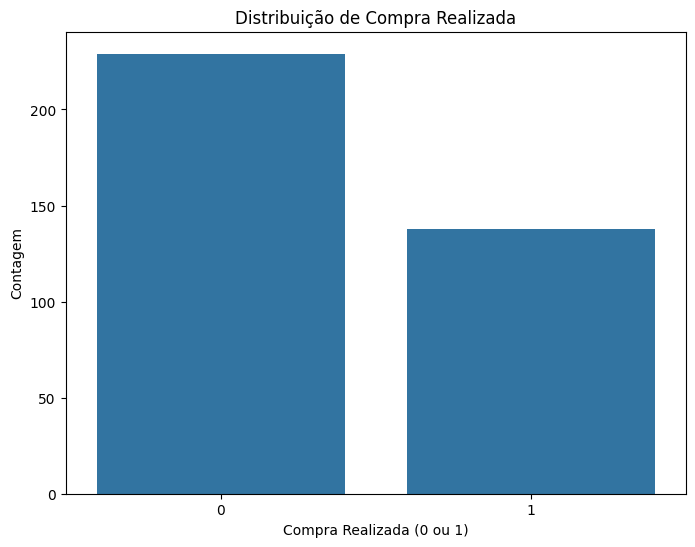

In [30]:
# 3. Gráfico de Barras para Compra Realizada
plt.figure(figsize=(8, 6))
sns.countplot(x='Purchased', data=df)
plt.title('Distribuição de Compra Realizada')
plt.xlabel('Compra Realizada (0 ou 1)')
plt.ylabel('Contagem')
plt.show()

 Pré-processamento

In [19]:
# Remover registros duplicados
df.drop_duplicates(inplace=True)

# Verificar se há valores ausentes
print(df.isnull().sum())

# Normalizar as variáveis numéricas 'Age' e 'EstimatedSalary'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])


Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


 Análise Estatística Detalhada

Matriz de Correlação:


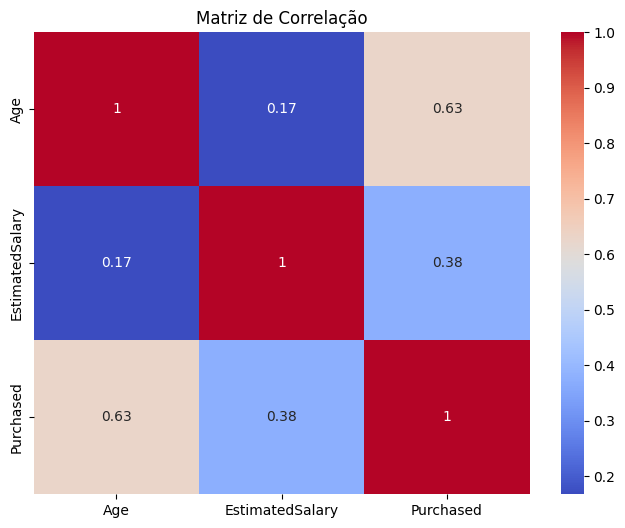

In [20]:
# Criar e exibir uma matriz de correlação entre as variáveis
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


No gráfico, as cores representam a intensidade da correlação. As células diagonais sempre mostram 1, porque cada variável tem uma correlação perfeita consigo mesma. As outras células mostram a relação entre variáveis diferentes.

Neste gráfico:
- "Age" e "Purchased" têm uma correlação moderada positiva (0.63).
- "EstimatedSalary" e "Purchased" têm uma correlação positiva mais fraca (0.38).
- "Age" e "EstimatedSalary" têm uma correlação fraca (0.17).

Isso sugere que as pessoas mais velhas têm maior probabilidade de fazer a compra e que um salário mais alto também está positivamente relacionado com a compra, mas de forma menos significativa.

Modelagem Preditiva:
Dividindo os dados em conjuntos de treino e teste:

In [31]:
# Dividir o DataFrame em variáveis independentes (X) e a variável alvo (y)
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Dividir os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Treinando um modelo de árvore de decisão:


In [32]:
# Criar e treinar o modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Avaliando o modelo:


In [23]:
# Fazer previsões no conjunto de teste e avaliar o desempenho
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[39  7]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        46
           1       0.74      0.71      0.73        28

    accuracy                           0.80        74
   macro avg       0.79      0.78      0.78        74
weighted avg       0.80      0.80      0.80        74



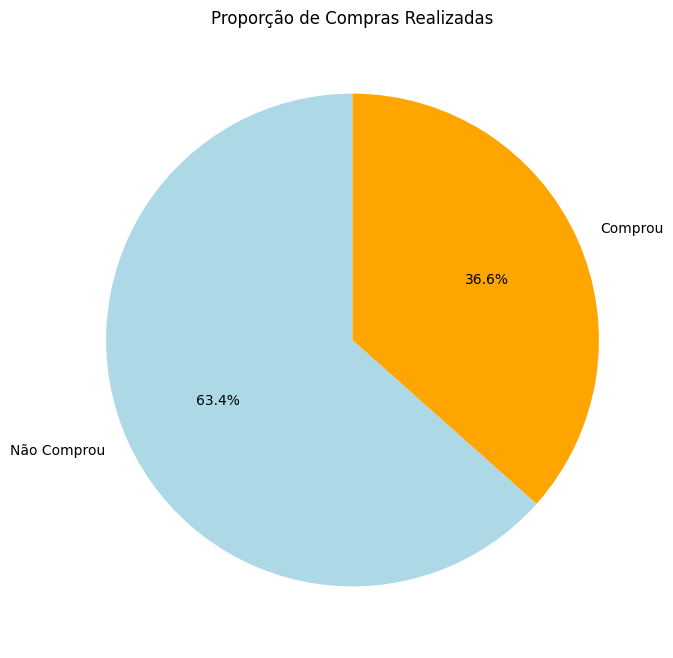

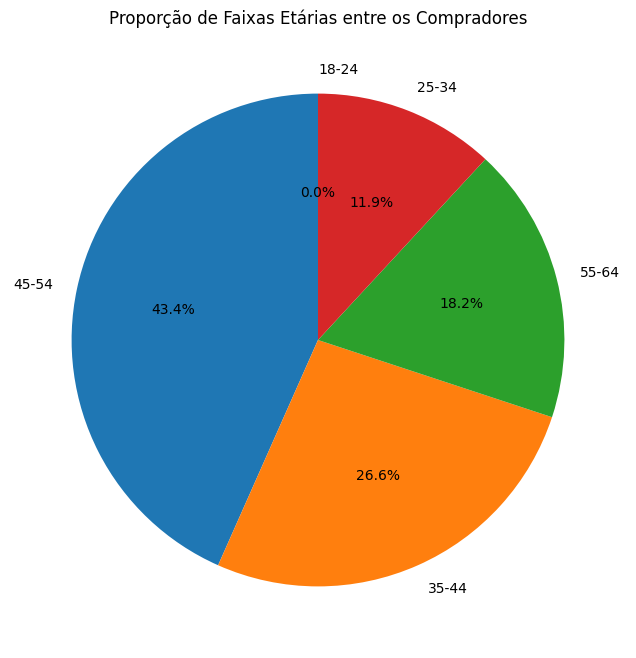

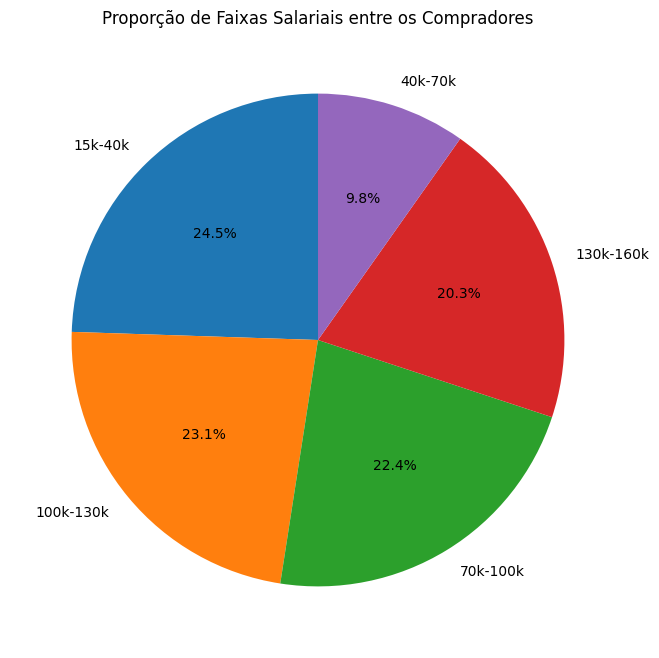

In [41]:


# Criar faixas etárias e salariais
df['Faixa_Etaria'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-24', '25-34', '35-44', '45-54', '55-64'])
df['Faixa_Salarial'] = pd.cut(df['EstimatedSalary'], bins=[15000, 40000, 70000, 100000, 130000, 160000], labels=['15k-40k', '40k-70k', '70k-100k', '100k-130k', '130k-160k'])

# Remover valores nulos se houver
df = df.dropna(subset=['Faixa_Etaria', 'Faixa_Salarial'])

# 1. Gráfico de pizza: Proporção de Compras Realizadas
compras = df['Purchased'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(compras, labels=['Não Comprou', 'Comprou'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Proporção de Compras Realizadas')
plt.show()

# 2. Gráfico de pizza: Proporção de Faixas Etárias entre os Compradores
compradores_por_faixa_etaria = df[df['Purchased'] == 1]['Faixa_Etaria'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(compradores_por_faixa_etaria, labels=compradores_por_faixa_etaria.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Faixas Etárias entre os Compradores')
plt.show()

# 3. Gráfico de pizza: Proporção de Faixas Salariais entre os Compradores
compradores_por_faixa_salarial = df[df['Purchased'] == 1]['Faixa_Salarial'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(compradores_por_faixa_salarial, labels=compradores_por_faixa_salarial.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Faixas Salariais entre os Compradores')
plt.show()